In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [4]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_rpp_with_mnt_2048.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(
    model_name,
    adapter_name_or_path,
    load_in_4bit,
    data_path,
    results_path,
    use_english_datasets,
    max_new_tokens,
)

microsoft/Phi-3.5-mini-instruct None False datasets/mac/mac.tsv results/mac-results_rpp_with_mnt_2048.csv False 2048


In [5]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading: /Users/inflaton/code/engd/papers/rapget-translation/eval_modules/calc_repetitions.py
loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`
Encoder model frozen.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 44 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00              1133 non-null   object
 3   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02              1133 non-null   object
 4   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04              1133 non-null   object
 5   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06              1133 non-null   object
 6   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08              1133 non-null   object
 7   internlm/internlm2_5-7b-chat/checkpoint-14

/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


In [6]:
result_columns = [col for col in df.columns[2:].to_list() if "rpp" in col]
result_columns.sort()
result_columns

['Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.06',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.08',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.10',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.00',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.02',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.04',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.06',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.08',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.10',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
 'microsoft/Phi-3.5-mini-instruct/checkp

In [7]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.06',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.08',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.10',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.00',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.02',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.04',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.06',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.08',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.10',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
  'microsoft/Phi-3.5-m

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 44 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00                   1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02                   1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04                   1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.06                   1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.08                   1133 non-null   object
 7   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp

In [9]:
metrics_path = results_path.replace(".csv", "_metrics.csv")
metrics_df = pd.read_csv(metrics_path) if os.path.exists(metrics_path) else None
metrics_df.info() if metrics_df is not None else None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   model                     42 non-null     object 
 1   rpp                       42 non-null     float64
 2   comet                     42 non-null     float64
 3   meteor                    42 non-null     float64
 4   spbleu                    42 non-null     float64
 5   bleu_1                    42 non-null     float64
 6   rouge_l                   42 non-null     float64
 7   ews_score                 42 non-null     float64
 8   repetition_score          42 non-null     float64
 9   total_repetitions         42 non-null     float64
 10  rap                       42 non-null     float64
 11  translation_completeness  42 non-null     float64
 12  num_max_output_tokens     42 non-null     int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 4.4+ KB


In [10]:
%%time

variant = "rpp"
metrics_df = get_metrics(
    df,
    max_output_tokens=max_new_tokens,
    variant=variant,
    existing_metrics_df=metrics_df,
)
metrics_df

['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct', 'internlm/internlm2_5-7b-chat', 'microsoft/Phi-3.5-mini-instruct', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat', 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat']


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Using existing metrics for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00
Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00: {'model': 'Qwen/Qwen2-72B-Instruct', 'rpp': 1.0, 'comet': 0.7570169081439618, 'meteor': 0.4789208192601603, 'spbleu': 18.953782447211417, 'bleu_1': 0.1895378244721141, 'rouge_l': 0.4520943414365094, 'ews_score': 0.0, 'repetition_score': 0.0988526037069726, 'total_repetitions': 0.0988526037069726, 'rap': 0.7537966634953808, 'translation_completeness': 1.0, 'num_max_output_tokens': 0}
Using existing metrics for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02
Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02: {'model': 'Qwen/Qwen2-72B-Instruct', 'rpp': 1.02, 'comet': 0.7573581492858762, 'meteor': 0.4796836675632054, 'spbleu': 19.0137490702917, 'bleu_1': 0.190137490702917, 'rouge_l': 0.4520458023287854, 'ews_score': 0.0, 'repetition_score': 0.0812003530450132, 'total_repetitions': 0.0812003530450132, 'rap': 0.7547074311557754, 'translation_completeness': 1.0, 'num_max_o

model   rpp     comet    meteor  \
0                     Qwen/Qwen2-72B-Instruct  1.00  0.757017  0.478921   
1                     Qwen/Qwen2-72B-Instruct  1.02  0.757358  0.479684   
2                     Qwen/Qwen2-72B-Instruct  1.04  0.757498  0.476363   
3                     Qwen/Qwen2-72B-Instruct  1.06  0.756385  0.467964   
4                     Qwen/Qwen2-72B-Instruct  1.08  0.755447  0.459758   
5                     Qwen/Qwen2-72B-Instruct  1.10  0.755010  0.451578   
6                      Qwen/Qwen2-7B-Instruct  1.00  0.745772  0.442241   
7                      Qwen/Qwen2-7B-Instruct  1.02  0.747408  0.440100   
8                      Qwen/Qwen2-7B-Instruct  1.04  0.748438  0.439014   
9                      Qwen/Qwen2-7B-Instruct  1.06  0.747161  0.432832   
10                     Qwen/Qwen2-7B-Instruct  1.08  0.745194  0.423561   
11                     Qwen/Qwen2-7B-Instruct  1.10  0.743207  0.413505   
12               internlm/internlm2_5-7b-chat  1.00  0.739700  0.429000   
13               internlm/internlm2_5-7b-chat  1.02  0.740224  0.426625   
14               internlm/internlm2_5-7b-chat  1.04  0.739886  0.415459   
15               internlm/internlm2_5-7b-chat  1.06  0.737936  0.403959   
16               internlm/internlm2_5-7b-chat  1.08  0.731999  0.387318   
17               internlm/internlm2_5-7b-chat  1.10  0.729535  0.376931   
18            microsoft/Phi-3.5-mini-instruct  1.00  0.710784  0.379683   
19            microsoft/Phi-3.5-mini-instruct  1.02  0.716477  0.378059   
20            microsoft/Phi-3.5-mini-instruct  1.04  0.711123  0.354716   
21            microsoft/Phi-3.5-mini-instruct  1.06  0.702436  0.329873   
22            microsoft/Phi-3.5-mini-instruct  1.08  0.688211  0.305454   
23            microsoft/Phi-3.5-mini-instruct  1.10  0.671299  0.290383   
24     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  0.750182  0.461111   
25     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  0.748511  0.457152   
26     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  0.750059  0.456047   
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  0.748813  0.452042   
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  0.747385  0.444211   
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  0.746571  0.437984   
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00  0.742640  0.433633   
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02  0.743648  0.432905   
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04  0.744094  0.432048   
33      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06  0.742650  0.427543   
34      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08  0.740810  0.420663   
35      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10  0.739269  0.411121   
36  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00  0.724024  0.406834   
37  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02  0.726310  0.406491   
38  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04  0.727613  0.405486   
39  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06  0.727687  0.401473   
40  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08  0.726393  0.398702   
41  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10  0.724401  0.393224   

       spbleu    bleu_1   rouge_l  ews_score  repetition_score  \
0   18.953782  0.189538  0.452094        0.0          0.098853   
1   19.013749  0.190137  0.452046        0.0          0.081200   
2   18.520633  0.185206  0.448904        0.0          0.105031   
3   17.982474  0.179825  0.441062        0.0          0.073257   
4   17.067954  0.170680  0.431750        0.0          0.047661   
5   16.224522  0.162245  0.424208        0.0          0.057370   
6   14.388149  0.143881  0.416055        0.0         12.812886   
7   15.161723  0.151617  0.416075        0.0          7.156222   
8   14.958632  0.149586  0.413811        0.0          0.185349   
9   14.280874  0.142809  0.406907        0.0          0.203001   
10  13.659684  0.136597  0.396632        0.0          0.221536   
11  12.922650  0.12922

In [11]:
metrics_df.to_csv(metrics_path, index=False)
metrics_df.describe()

comet     meteor     spbleu     bleu_1    rouge_l  ews_score  \
count  42.000000  42.000000  42.000000  42.000000  42.000000       42.0   
mean    0.736585   0.418134  13.836401   0.138364   0.393948        0.0   
std     0.018671   0.042615   3.443285   0.034433   0.043012        0.0   
min     0.671299   0.290383   4.091959   0.040920   0.251653        0.0   
25%     0.727631   0.402094  12.868566   0.128686   0.381652        0.0   
50%     0.742645   0.427084  14.334512   0.143345   0.403171        0.0   
75%     0.748180   0.443718  16.025109   0.160251   0.418653        0.0   
max     0.757498   0.479684  19.013749   0.190137   0.452094        0.0   

       repetition_score  total_repetitions        rap  \
count         42.000000          42.000000  42.000000   
mean           3.324213           3.324213   0.680606   
std            5.606206           5.606206   0.081233   
min            0.047661           0.047661   0.448549   
25%            0.106355           0.106355   0.608625   
50%            0.186231           0.186231   0.722409   
75%            6.128420           6.128420   0.743471   
max           28.426302          28.426302   0.754707   

       translation_completeness  num_max_output_tokens  
count                 42.000000              42.000000  
mean                   0.999622               0.547619  
std                    0.001172               1.063872  
min                    0.994704               0.000000  
25%                    1.000000               0.000000  
50%                    1.000000               0.000000  
75%                    1.000000               1.000000  
max                    1.000000               6.000000

In [12]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct',
       'internlm/internlm2_5-7b-chat', 'microsoft/Phi-3.5-mini-instruct',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat'], dtype=object)

In [13]:
# list of markers for plotting
markers = [
    "o",
    "x",
    "^",
    "s",
    "d",
    "P",
    "X",
    "*",
    "v",
    ">",
    "<",
    "p",
    "h",
    "H",
    "+",
    "|",
    "_",
]
markers = {model: marker for model, marker in zip(models, markers)}

In [14]:
model_orders = {
    "microsoft/Phi-3.5-mini-instruct": 5,
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [15]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    columns,
    titles,
    log_scales=[False, False],
    sync_y_axis=False,
):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df[variant].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df[variant]]
        for i, column in enumerate(columns):
            current_ax = twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Repetition Penalty Parameter (RPP)")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(
        zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]]
    )
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.75 if len(columns) > 1 else -0.435),
    )

    plt.show()

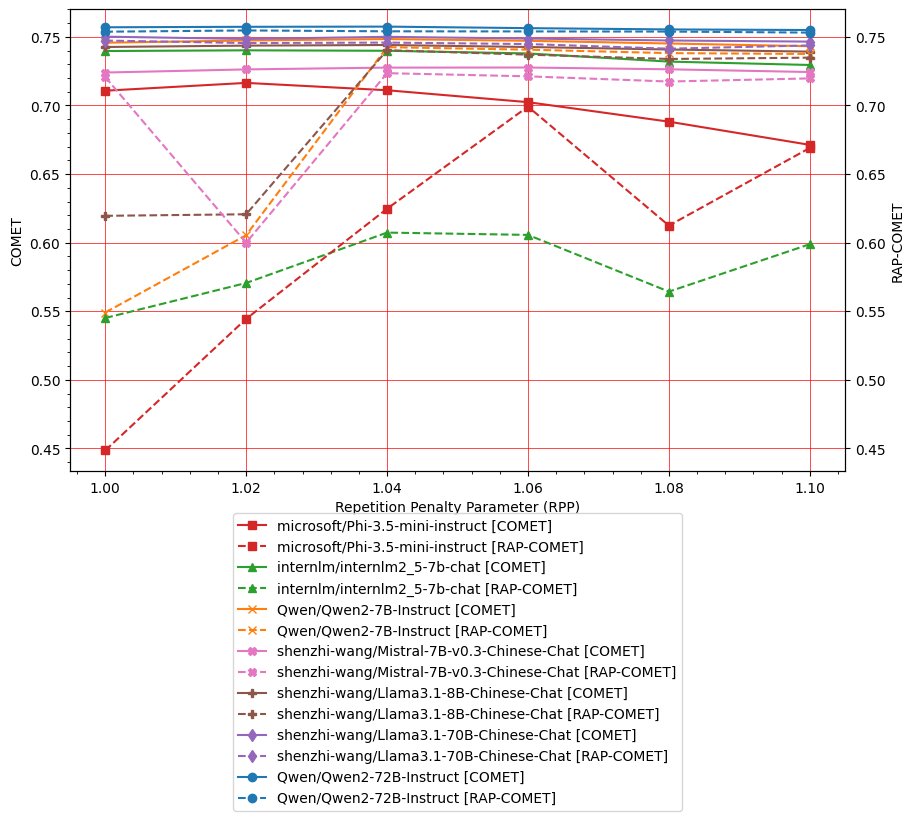

In [16]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet", "rap"],
    ["COMET", "RAP-COMET"],
    sync_y_axis=True,
)

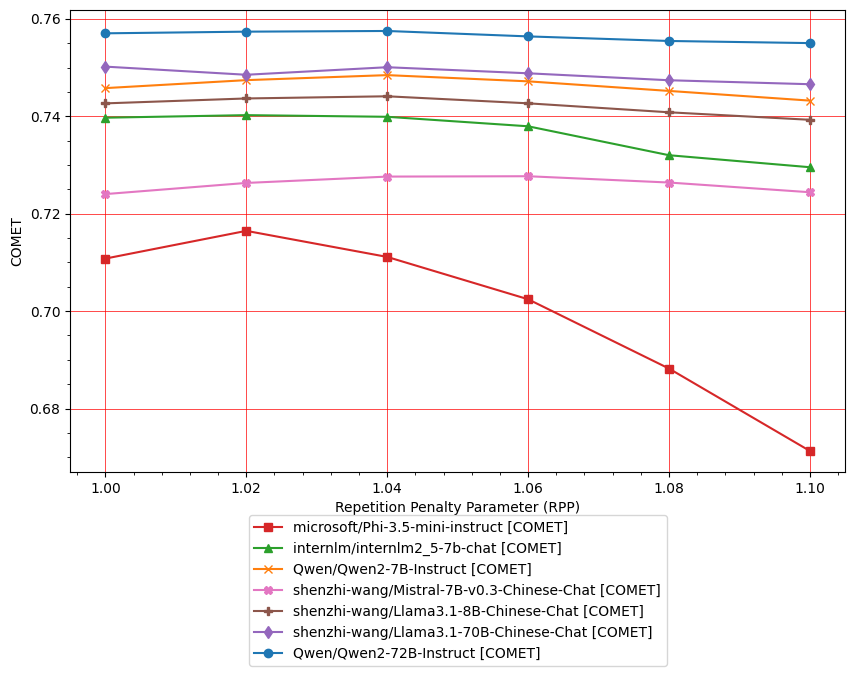

In [17]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet"],
    ["COMET"],
)

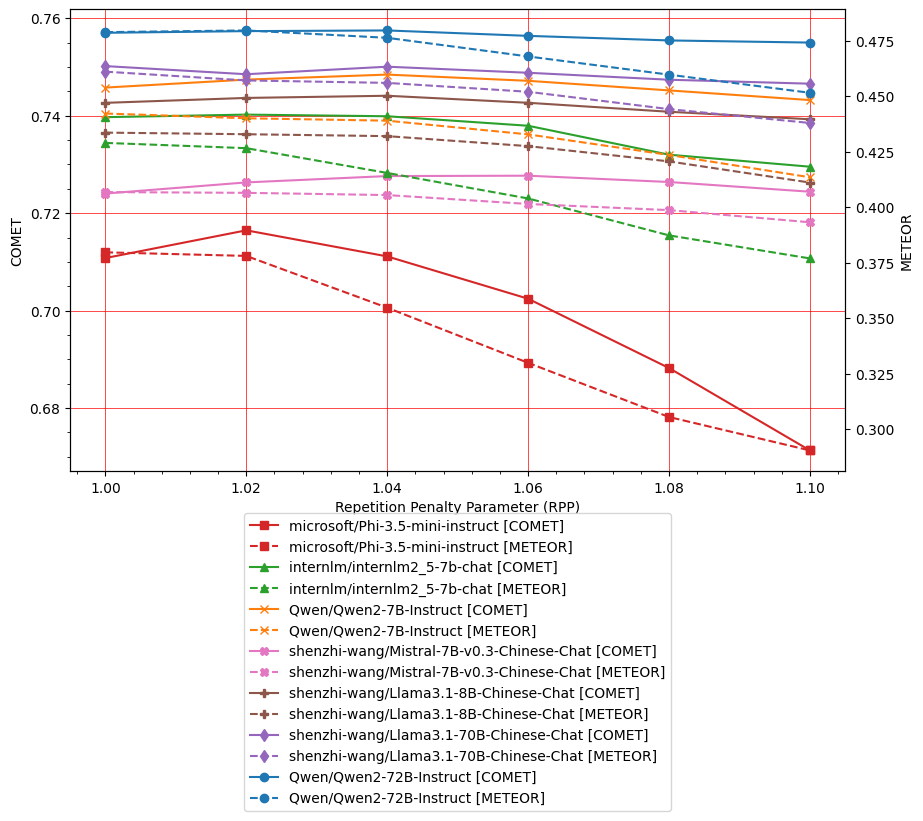

In [18]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet", "meteor"],
    ["COMET", "METEOR"],
)

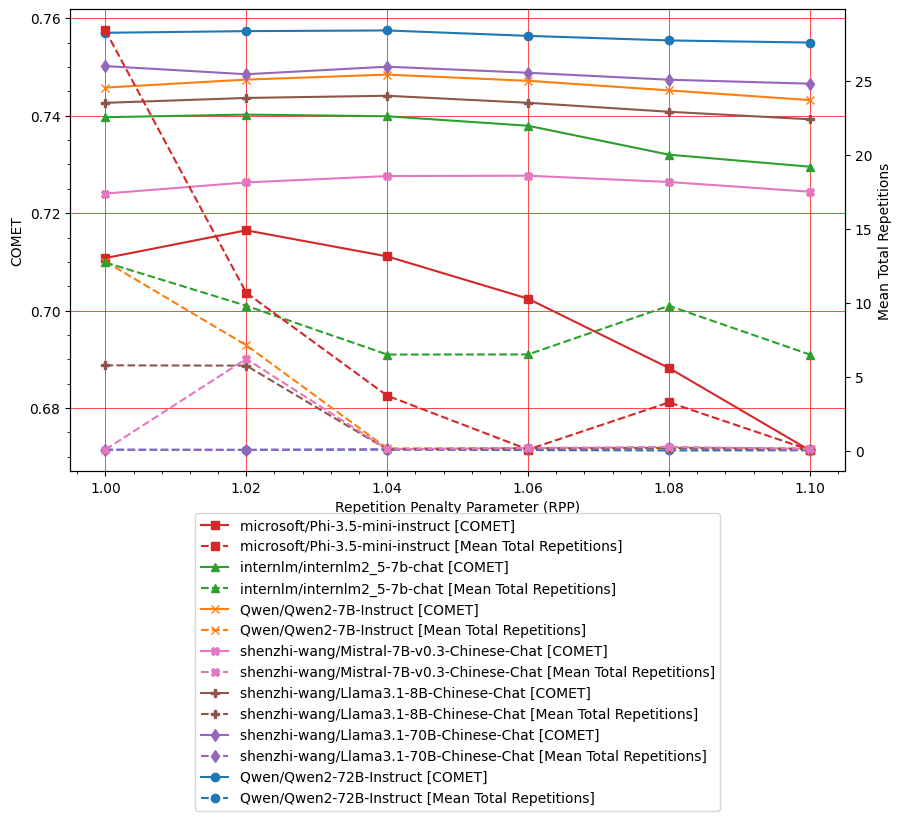

In [19]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet", "total_repetitions"],
    ["COMET", "Mean Total Repetitions"],
)

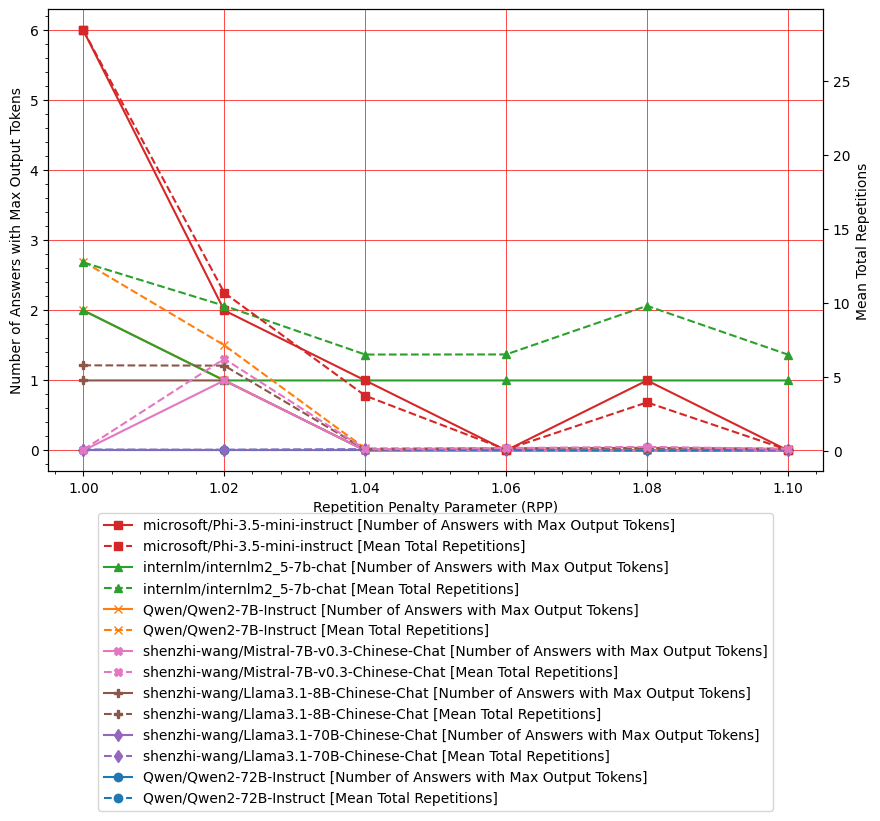

In [20]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["num_max_output_tokens", "total_repetitions"],
    ["Number of Answers with Max Output Tokens", "Mean Total Repetitions"],
)

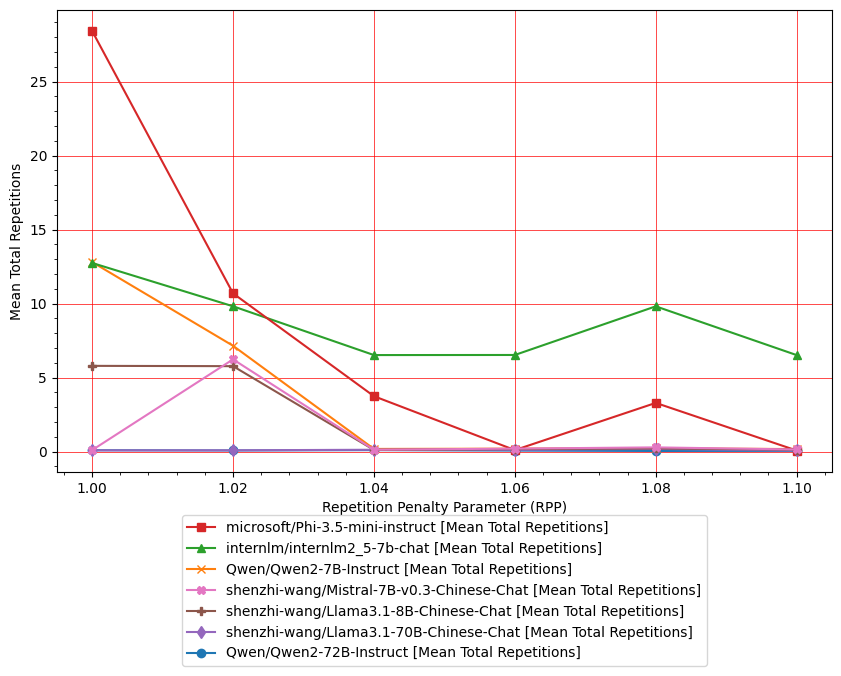

In [22]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["total_repetitions"],
    ["Mean Total Repetitions"],
)

In [21]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(
        df, col, repetition_threshold=50, max_new_tokens=max_new_tokens
    )

### Analyzing: Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00

*** Found 0 rows with output_tokens >= 2048 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00

*** Found 0 rows with incomplete translations for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00
### Analyzing: Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02

*** Found 0 rows with output_tokens >= 2048 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02

*** Found 0 rows with incomplete translations for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02
### Analyzing: Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04

*** Found 0 rows with output_tokens >= 2048 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04

*** Found 0 rows with incomple